# MBA FIAP Inteligência Artificial & Machine Learning

## Visão Computacional: Análise de Imagens Médicas

> Atenção: este notebook foi desenhado para funcionar no **Google Collab**.


## 1. Introdução

Uma determinada fintech focada em consumidores finais pessoa física constataou um grande número de fraudes em transações bancárias.

O setor de fraudes apontou que existem clientes que se queixaram de não contratar serviços específicos, como o crédito pessoal, e após isso transferir para outras contas desconhecidas. 

Após análises pelas equipes de segurança, os protocolos de utilização da senha foram realizados em conformidade, ou seja, cada cliente autenticou com sua própria senha de maneira regular.

Em função disso, o banco precisa arcar com reembolsos e medidas de contenção para evitar processos judiciais, pois os clientes alegam terem sido invadidos por hackers ou algo parecido.

Uma das formas de solucionar ou minimizar este problema é com a utilização de outras formas de autenticação, sobretudo em operações críticas, como a obtenção de crédito pessoal.

Desta forma podemos implementar uma verificação de identidade com prova de vida (liveness), que utilize uma verificação e identificação facial. 

Caso o cliente não seja autenticado, ele será atendido por uma esteira dedicada e as evidências da não identificação serão encaminhadas para a área de IA para validação dos parâmetros e limiares para aperfeiçoamento do modelo.

Será necessário construir:

* Detector de faces
* Identificação de faces (podendo ser um comparador entre um rosto de documento e outra da prova de vida)
* Detecção de vivacidade (liveness) para evitar que um fraudador utilize uma foto estática.


>Formas alternativas de prover a identificação e prova de vivacidade, além destas que foram solicitadas poderão ser submetidas.


<p align="center">
    <img src="imagens/liveness.jpg">
</p>

Imagem retirada do [Grunge](https://www.grunge.com/192826/company-testing-robocop-facial-recognition-software-with-us-police/).

## 2. Instruções

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas.

Iremos constuir uma forma de validar se uma determinada imagem foi ou não adulterada e se trata de uma produção fraudade.

Existem diversas formas de validar a vivacidade, e neste sentido conto com a criatividade de vocês dado que já dominam encontrar uma face numa imagem, aplicar marcos faciais e até mesmo construir uma rede neural convulacional.

A abordagem mais simples é pela construção de uma rede neural com imagens de fotos de rostos de outras fotos e fotos de rostos sem modificações. Tal classificador deverá classificar se dada imagem possui vivacidade ou não com uma pontuação de probabilidade.

Referências que abordam o tema para servir de inspiração:

1. [PyImageSearch](https://pyimagesearch.com/2019/03/11/liveness-detection-with-opencv/), Liveness detection with OpenCV;
2. [Kickertech](https://kickertech.com/face-liveness-detection-via-opencv-and-tensorflow/), Liveness detection via OpenCV and Tensorflow.
3. [Towards Data Science](https://towardsdatascience.com/real-time-face-liveness-detection-with-python-keras-and-opencv-c35dc70dafd3?gi=24f8e1b740f9), Real-time face liveness detection with Python, Keras and OpenCV.

Este projeto poderá ser feita por grupos de até 4 pessoas.
Caso este projeto seja substitutivo, deverá ser realizado por apenas uma pessoa.

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------- | :-----: |
| CAIQUE DE MOURA VASCONCELOS | rm352508      | 5DTSR |
| DOUGLAS CARVALHO CABRAL | rm352626      | 5DTSR |
| FABIO COELHO DA SILVA | rm352605      | 5DTSR |
| LEONARDO CAETANO DE SIQUEIRA | rm351619      | 5DTSR |

## 3. Abordagem e organização da solução do problema (2 pontos)

Como o grupo pretende deteccar a prova de vivacidade de uma determinada imagem? Quais os passos e os building blocks deste processo?

**Resposta**: 

1) Detectar se há somente uma face na captura
2) Detectar se há mãos ou dedos aparentes
3) Passar a imagem para uma CNN

## 4 Desenvolvimento da solução (5,5 pontos)

Detalhe o passo-a-passo do algoritmo de deteção de vivacidade.
Se optar pela construção e treinamento de um modelo de redes neurais convulucionais, apresente a arquitetura, prepare os dados de treinamento, realize o treinamento.

In [ ]:
!pip install mediapipe

In [1]:
import cv2
import mediapipe as mp
import numpy as np

2024-07-07 10:33:39.830961: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/douglascabral/Library/Mobile Documents/com~apple~CloudDocs/MBA/12-ComputerVision/fiap-ml-visao-computacional-detector-liveness/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Inicializar MediaPipe Face Mesh e Hand
mp_face_mesh = mp.solutions.face_mesh
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
face_mesh = mp_face_mesh.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5)
hands = mp_hands.Hands(min_detection_confidence=0.5, min_tracking_confidence=0.5)

I0000 00:00:1720359227.309875  143394 gl_context.cc:357] GL version: 2.1 (2.1 INTEL-22.5.11), renderer: Intel(R) Iris(TM) Plus Graphics OpenGL Engine
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1720359227.316040  143689 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1720359227.323301  143689 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1720359227.323392  143394 gl_context.cc:357] GL version: 2.1 (2.1 INTEL-22.5.11), renderer: Intel(R) Iris(TM) Plus Graphics OpenGL Engine


W0000 00:00:1720359227.353303  143699 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1720359227.399982  143700 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [ ]:
cap = cv2.VideoCapture(0)
etapa_atual = 0

while cap.isOpened():
    ret, quadro = cap.read()
    if not ret:
        break

    quadro_rgb  = cv2.cvtColor(quadro, cv2.COLOR_BGR2RGB)
    quadro_gray = cv2.cvtColor(quadro, cv2.COLOR_BGR2GRAY)

    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Detectar faces na imagem
    faces = face_cascade.detectMultiScale(quadro_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    num_faces = len(faces)

    # Desenhar retângulos ao redor das faces detectadas
    for (x, y, w, h) in faces:
        cv2.rectangle(quadro, (x, y), (x + w, y + h), (255, 0, 0), 2)

    resultados_faces = face_mesh.process(quadro_rgb)
    resultados_maos  = hands.process(quadro_rgb)

    altura_imagem, largura_imagem, _ = quadro.shape

    maos_detectadas = resultados_maos.multi_hand_landmarks is not None


    if num_faces == 0:
        etapa_atual = 0
        cv2.putText(quadro, f"Nenhuma face detectada. Reiniciando processo!", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    elif (num_faces > 1):
        etapa_atual = 0
        cv2.putText(quadro, f"Mais de uma face detectada. Reiniciando processo!", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    elif maos_detectadas:
        etapa_atual = 0
        cv2.putText(quadro, f"Maos detectadas!", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    elif etapa_atual == 0:
        etapa_atual = 1

    if etapa_atual == 1:
        cv2.putText(quadro, f"Olhe para a direita!", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        if resultados_faces.multi_face_landmarks:
            for face_landmarks in resultados_faces.multi_face_landmarks:
                left_vector, right_vector = calcular_direcao(face_landmarks.landmark)
                # Exibir vetores na imagem
                cv2.putText(quadro, f'Left Eye Vector: {left_vector}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
                cv2.putText(quadro, f'Right Eye Vector: {right_vector}', (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    cv2.imshow("Vivacidade", quadro)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

### 4.1 Organização de dados para treinamento de modelo de liveness (2 pontos)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
# Todas as configurações personalizáveis do treino do CNN ficam aqui.
# Fique a vontade para mudar conforme necessidade.

NUMERO_DE_EPOCAS_CNN = 50
NUMERO_PACIENCIA_EPOCAS_CNN = 15
PATH_MELHOR_MODELO_CNN = '_melhor_modelo_cnn/modelo.keras'
BATCH_SIZE_CNN = 256
COMPRAR = 0
VENDER  = 1
IMAGEM_LARGURA = 64
IMAGEM_ALTURA = 64

In [12]:
early_stopping_callback_cnn = EarlyStopping(
    monitor='val_loss',
    min_delta=0.05,  # Mudança mínima considerada como melhoria
    patience=NUMERO_PACIENCIA_EPOCAS_CNN,  # Número de épocas sem melhoria após o qual o treinamento será parado
    verbose=1,
    mode='min',
    restore_best_weights=True  # Restaura os melhores pesos encontrados durante o treinamento
)

In [13]:
model_checkpoint_callback_cnn = ModelCheckpoint(
    filepath=PATH_MELHOR_MODELO_CNN,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)

In [14]:
treino_dir = 'assets/treino'
teste_dir = 'assets/teste'

In [15]:
treino_datagen = ImageDataGenerator(rescale=1.0/255.0)
teste_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [16]:
treino_ds = treino_datagen.flow_from_directory(
    treino_dir,
    target_size=(IMAGEM_ALTURA, IMAGEM_LARGURA),
    batch_size=BATCH_SIZE_CNN,
    #color_mode='grayscale',
    class_mode='binary'
)

teste_ds = teste_datagen.flow_from_directory(
    teste_dir,
    target_size=(IMAGEM_ALTURA, IMAGEM_LARGURA),
    batch_size=BATCH_SIZE_CNN,
    #color_mode='grayscale',
    class_mode='binary'
)

Found 2650 images belonging to 2 classes.
Found 1451 images belonging to 2 classes.


In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGEM_ALTURA, IMAGEM_LARGURA, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.50),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # 2 classes
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
)

### 4.2 Treinamento de modelo de liveness (1,5 pontos)

In [18]:
history = model.fit(
    treino_ds,
    validation_data=teste_ds,
    epochs=NUMERO_DE_EPOCAS_CNN,
    callbacks=[early_stopping_callback_cnn, model_checkpoint_callback_cnn]
)

Epoch 1/50


/Users/douglascabral/Library/Mobile Documents/com~apple~CloudDocs/MBA/12-ComputerVision/fiap-ml-visao-computacional-detector-liveness/venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 612ms/step - accuracy: 0.6442 - loss: 0.7299
Epoch 1: val_loss improved from inf to 0.53935, saving model to _melhor_modelo_cnn/modelo.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.6463 - loss: 0.7271 - val_accuracy: 0.8622 - val_loss: 0.5393
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 614ms/step - accuracy: 0.6796 - loss: 0.6298
Epoch 2: val_loss improved from 0.53935 to 0.52130, saving model to _melhor_modelo_cnn/modelo.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 902ms/step - accuracy: 0.6801 - loss: 0.6289 - val_accuracy: 0.8622 - val_loss: 0.5213
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 613ms/step - accuracy: 0.6993 - loss: 0.5726
Epoch 3: val_loss improved from 0.52130 to 0.30347, saving model to _melhor_modelo_cnn/modelo.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 867ms/step - accuracy: 0.7013 - loss: 0.5704 - val_accuracy: 0.8608 - val_loss: 0.3035
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 612ms/step - accuracy: 0.7842 - loss: 0.4680
Epoch 4: val_loss di

### 4.3 Métricas de desempenho do modelo (2 pontos)

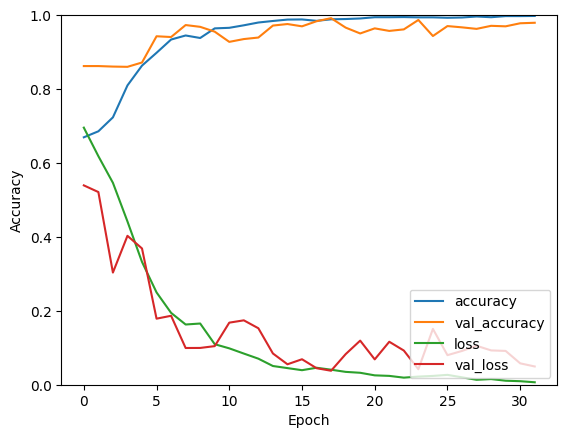

In [19]:
# exibir dados de history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [20]:
model_cnn = load_model(PATH_MELHOR_MODELO_CNN)

true_labels = teste_ds.classes

predictions = model.predict(teste_ds)
predicted_labels = (predictions > 0.5).astype(int).flatten()

loss, accuracy = model_cnn.evaluate(teste_ds)
print("Acurácia do modelo: ", accuracy)

conf_matrix = confusion_matrix(true_labels, predicted_labels)
print(f'Confusion Matrix:\n{conf_matrix}')

precision = precision_score(true_labels, predicted_labels)
print(f'Precision: {precision:.2f}')

recall = recall_score(true_labels, predicted_labels)
print(f'Recall: {recall:.2f}')

f1 = 2 * (precision * recall) / (precision + recall)
print(f'F1-Score: {f1:.2f}')


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 420ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 488ms/step - accuracy: 0.9912 - loss: 0.0356
Acurácia do modelo:  0.9917298555374146
Confusion Matrix:
[[1070  181]
 [ 171   29]]
Precision: 0.14
Recall: 0.14
F1-Score: 0.14


## 5 Teste Fim-a-Fim

Simule a operação fim-a-fim, com uma imagem de entrada forjada (foto de foto de um rosto) e outra com uma imagem de rosto, exibindo o resultado da classificação e a pontuação de cada classe.

In [29]:
def prever_imagem(src):
    mp_hands = mp.solutions.hands
    hands = mp_hands.Hands(min_detection_confidence=0.5, min_tracking_confidence=0.5)

    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    image_read = cv2.imread(src)
    image_rgb = cv2.cvtColor(image_read, cv2.COLOR_BGR2RGB)
    image_gray = cv2.cvtColor(image_read, cv2.COLOR_BGR2GRAY)

    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

    # Detectar faces na imagem
    faces = face_cascade.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    num_faces = len(faces)

    resultados_maos  = hands.process(image_rgb)

    maos_detectadas = resultados_maos.multi_hand_landmarks is not None

    if num_faces == 0 or num_faces > 1 or maos_detectadas:
        print(f"Esta imagem é mais provavelmente: Fake (Maos, sem faces ou mais de uma face detectada)")
        return None

    img = image.load_img(src, target_size=(IMAGEM_ALTURA, IMAGEM_LARGURA))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalizar a imagem

    prediction = model_cnn.predict(img_array)

    # Porcetagem para cada classe prevista
    porcentagem_real = prediction[0][0] * 100
    porcentagem_fake = (1 - prediction[0][0]) * 100


    classe_prevista = 'Real' if prediction[0] > 0.5 else 'Fake'
    porcentagem = porcentagem_real if classe_prevista == 'Real' else porcentagem_fake
    print(porcentagem)


    print(f"Esta imagem é mais provavelmente: {classe_prevista}")


I0000 00:00:1720362190.420514  143394 gl_context.cc:357] GL version: 2.1 (2.1 INTEL-22.5.11), renderer: Intel(R) Iris(TM) Plus Graphics OpenGL Engine
W0000 00:00:1720362190.487789  188585 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1720362190.517980  188585 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


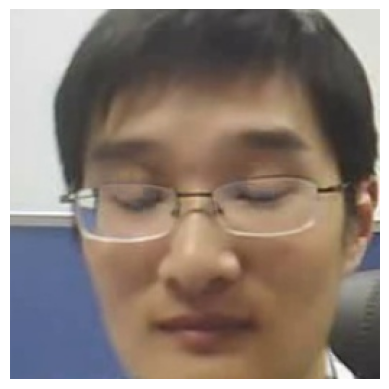

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
98.94775152206421
Esta imagem é mais provavelmente: Real


I0000 00:00:1720362190.868212  143394 gl_context.cc:357] GL version: 2.1 (2.1 INTEL-22.5.11), renderer: Intel(R) Iris(TM) Plus Graphics OpenGL Engine
W0000 00:00:1720362190.892654  188616 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1720362190.916824  188616 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


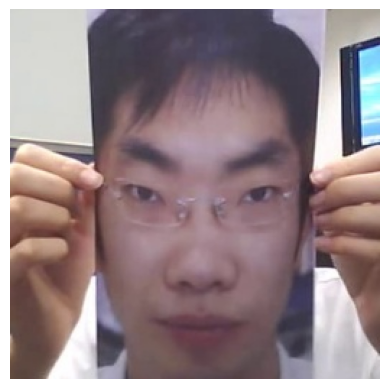

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
99.99923331188256
Esta imagem é mais provavelmente: Fake


I0000 00:00:1720362191.315818  143394 gl_context.cc:357] GL version: 2.1 (2.1 INTEL-22.5.11), renderer: Intel(R) Iris(TM) Plus Graphics OpenGL Engine
W0000 00:00:1720362191.337504  188639 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1720362191.359484  188639 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


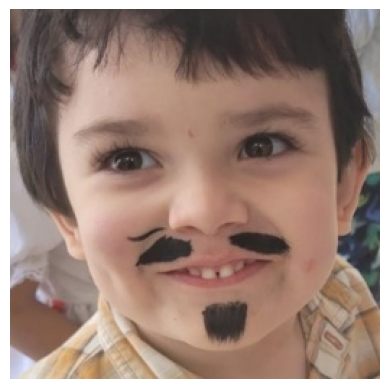

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
86.19921803474426
Esta imagem é mais provavelmente: Real


I0000 00:00:1720362191.724722  143394 gl_context.cc:357] GL version: 2.1 (2.1 INTEL-22.5.11), renderer: Intel(R) Iris(TM) Plus Graphics OpenGL Engine
W0000 00:00:1720362191.756663  188666 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1720362191.832828  188661 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


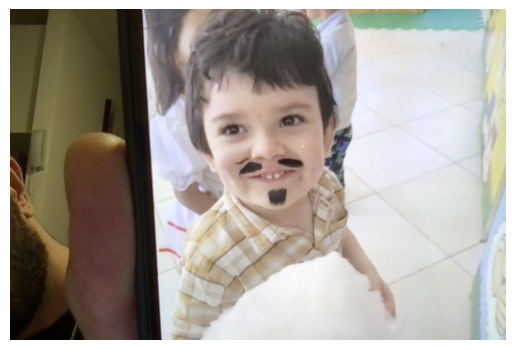

Esta imagem é mais provavelmente: Fake (Maos, sem faces ou mais de uma face detectada)


I0000 00:00:1720362192.864639  143394 gl_context.cc:357] GL version: 2.1 (2.1 INTEL-22.5.11), renderer: Intel(R) Iris(TM) Plus Graphics OpenGL Engine
W0000 00:00:1720362192.889992  188689 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1720362192.918483  188685 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


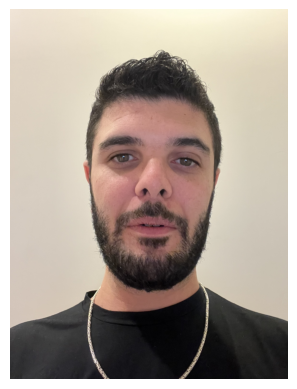

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
99.99994039535522
Esta imagem é mais provavelmente: Real


I0000 00:00:1720362193.746421  143394 gl_context.cc:357] GL version: 2.1 (2.1 INTEL-22.5.11), renderer: Intel(R) Iris(TM) Plus Graphics OpenGL Engine
W0000 00:00:1720362193.765777  188726 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1720362193.797993  188727 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


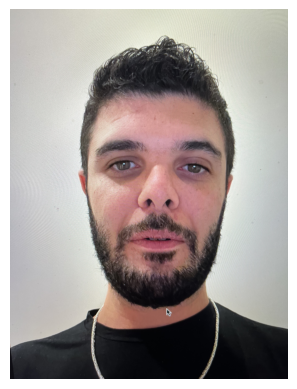

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
99.4674801826477
Esta imagem é mais provavelmente: Real


I0000 00:00:1720362198.104007  143394 gl_context.cc:357] GL version: 2.1 (2.1 INTEL-22.5.11), renderer: Intel(R) Iris(TM) Plus Graphics OpenGL Engine
W0000 00:00:1720362198.128093  188803 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1720362198.148498  188803 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


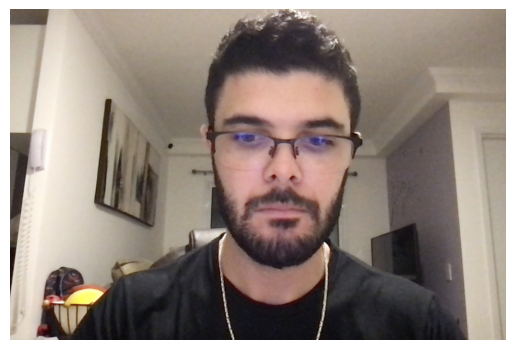

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
99.67277646064758
Esta imagem é mais provavelmente: Real


I0000 00:00:1720362199.268325  143394 gl_context.cc:357] GL version: 2.1 (2.1 INTEL-22.5.11), renderer: Intel(R) Iris(TM) Plus Graphics OpenGL Engine
W0000 00:00:1720362199.293621  188829 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1720362199.330964  188832 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


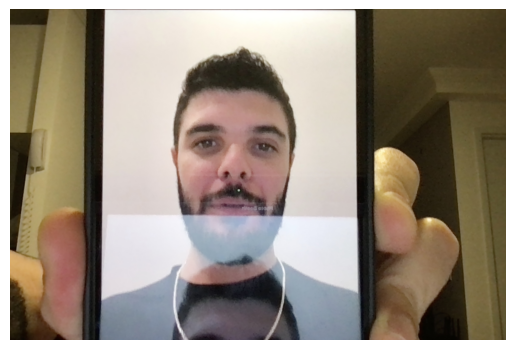

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
96.47202827036381
Esta imagem é mais provavelmente: Fake


I0000 00:00:1720362200.531656  143394 gl_context.cc:357] GL version: 2.1 (2.1 INTEL-22.5.11), renderer: Intel(R) Iris(TM) Plus Graphics OpenGL Engine
W0000 00:00:1720362200.555490  188857 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1720362200.575600  188857 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


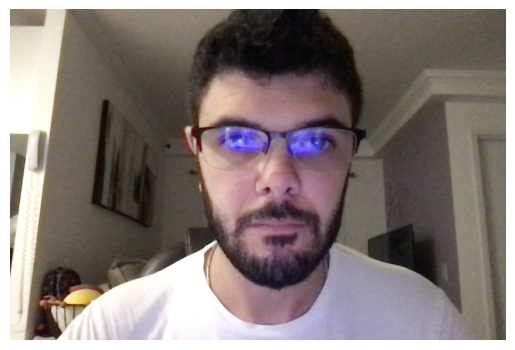

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
86.05037927627563
Esta imagem é mais provavelmente: Real


I0000 00:00:1720362201.706616  143394 gl_context.cc:357] GL version: 2.1 (2.1 INTEL-22.5.11), renderer: Intel(R) Iris(TM) Plus Graphics OpenGL Engine
W0000 00:00:1720362201.725388  188900 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1720362201.748658  188898 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


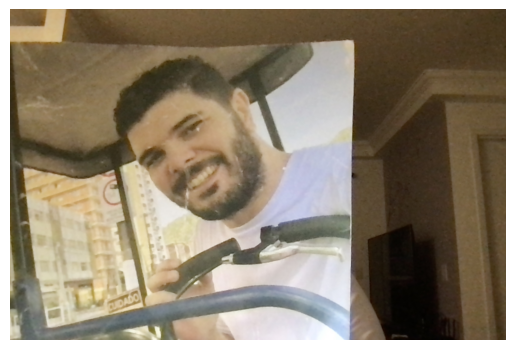

Esta imagem é mais provavelmente: Fake (Maos, sem faces ou mais de uma face detectada)


I0000 00:00:1720362202.890413  143394 gl_context.cc:357] GL version: 2.1 (2.1 INTEL-22.5.11), renderer: Intel(R) Iris(TM) Plus Graphics OpenGL Engine
W0000 00:00:1720362202.915749  188918 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1720362202.950772  188914 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


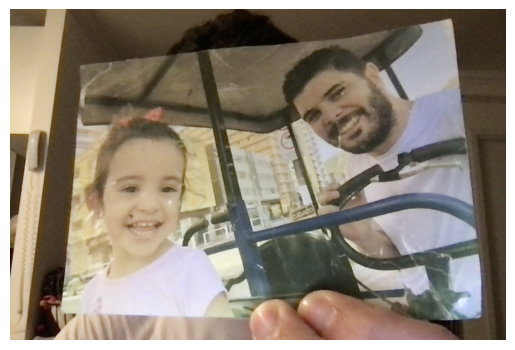

Esta imagem é mais provavelmente: Fake (Maos, sem faces ou mais de uma face detectada)


I0000 00:00:1720362204.046607  143394 gl_context.cc:357] GL version: 2.1 (2.1 INTEL-22.5.11), renderer: Intel(R) Iris(TM) Plus Graphics OpenGL Engine
W0000 00:00:1720362204.077362  188945 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1720362204.102921  188945 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


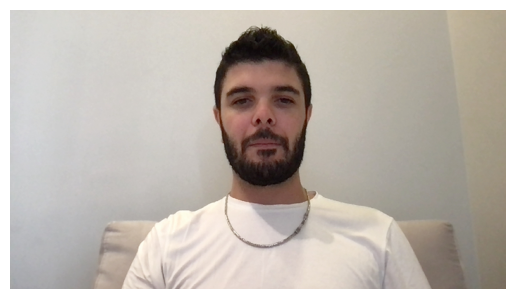

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
99.88071918487549
Esta imagem é mais provavelmente: Real


I0000 00:00:1720362204.674344  143394 gl_context.cc:357] GL version: 2.1 (2.1 INTEL-22.5.11), renderer: Intel(R) Iris(TM) Plus Graphics OpenGL Engine
W0000 00:00:1720362204.718597  189002 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1720362204.743045  189002 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


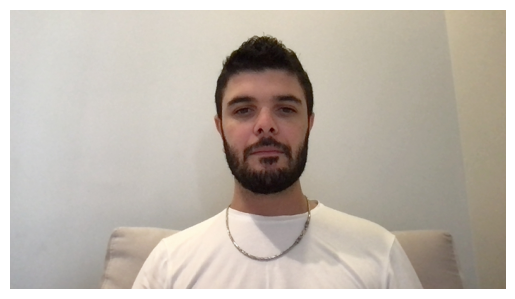

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
99.96475577354431
Esta imagem é mais provavelmente: Real


I0000 00:00:1720362205.177838  143394 gl_context.cc:357] GL version: 2.1 (2.1 INTEL-22.5.11), renderer: Intel(R) Iris(TM) Plus Graphics OpenGL Engine
W0000 00:00:1720362205.338164  189027 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1720362205.362503  189027 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


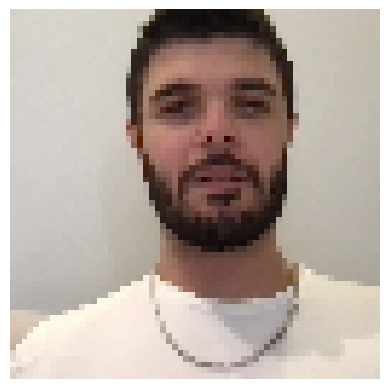

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
99.99828934669495
Esta imagem é mais provavelmente: Real


In [33]:
prever_imagem('assets/teste/real/11_1.avi_125_real.jpg')
prever_imagem('assets/teste/fake/1_3.avi_50_fake.jpg')
prever_imagem('../recortado.jpg')
prever_imagem('../levi-fake2.jpg')
prever_imagem('../cabral-real.jpg')
prever_imagem('../cabral-fake.jpg')
prever_imagem('../cabral-real2.jpg')
prever_imagem('../cabral-fake2.jpg')
prever_imagem('../cabral-real3.jpg')
prever_imagem('../cabral-fake3.jpg')
prever_imagem('../cabral-fake4.jpg')
prever_imagem('../Real_55.76.png')
prever_imagem('../Real_80.93.png')
prever_imagem('../Real_95.88.png')


>Com a implementação da solução na forma de uma aplicação do [Streamlit](https://www.streamlit.io/) (veja a pata streamlit-app e use o template) vale 1 ponto adicional.

**Pergunta**: Se utilizou o Streamlit, compartilhe a URL do aplicativo publicado:

**Resposta**:

## 6 Conclusões (2,5 pontos)

**Pergunta**: Dado todo o estudo e pesquisa, quais foram as conclusões sobre a solução, o que funcionou, o que não funcionou e quais os detalhes que observariam numa nova versão e melhorias do processo?

**Resposta**: